# Fundamentals of Data Analysis (FoDA) - Project 2020

                                                                          Author: Sheldon D'Souza, email: G00387857@gmit.ie

***

# Objective

The objective of the project is to perform and explain simple linear regression using Python on the powerproduction dataset given. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

The git repository will contain, at a minimum, the following items:
1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance the submission, consider comparing simple linear regression to other types of regression on this data set.

## Project Plan:

- Use lecture notes from ProgDA module (Machine learning - sklearn) which goes regression and machine learning concepts
- Read through and research linear regression and other forms of regression (e.g. exponential etc)
- add powerproduction.csv to the repository
- load the csv file into a pandas dataframe
- analyse the data to ensure its integrity
- plot the data using a lineplot and regression plot
- use sklearn to perform linear regression and analyse the results
- perfrom other sorts of analysis


## Introduction

What is regression and the forms of regression


**[TO BE COMPLETED]**


What is the purpose and uses of regression

**[TO BE COMPLETED]**



## Import the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Import the csv and load pandas dataframe

In [2]:
df = pd.read_csv('powerproduction.csv', sep=',')

#### Analyse the head of the dataframe

In [3]:
df.head(10) #Analyse the first few rows

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


#### Analyse the tail of the dataframe

In [4]:
df.tail(10) #Analyse the last  few rows

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


#### Analyse the summay of the dataframe

In [5]:
df.describe() # check summary of data

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### Data where 'power' variable is Nil

In the cells below, I did a check to see how many values of power had a nil value. We made the following observations:

- Speed values of 0.275 and less and nil power output. This could be explained by the wind speed being two low to generate any power i.e. there is a mimimum threshold of wind speed to generate power.
- Speed values of 24.499 and above had nil power output. We would expect that after a certain windspeed, there would be no further incresase in power output. I would have expected these speed variables to have a constant value (of the maximum output) rather than a nil value
- There were certain values in the middle where the power was nil for a moderate amount of speed. I have assumed that these are anomalies in the data. I have ignored them for the purpose of the regression analysis, as I do not believe that they will have a material impact on the regression analysis. If there is time, I may clean up the data and check the impact on the regression analysis.


In [6]:
df.loc[df['power'] == 0]

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


## Plot of the Data for visualisation - scatterplot with seaborn

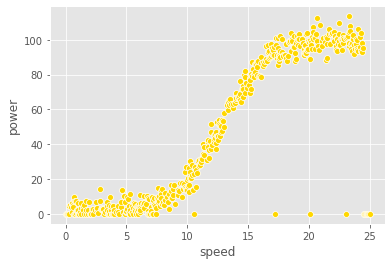

In [17]:
# Plot the data points as a scatterplot to visualise the data

sns.scatterplot(data = df, x="speed", y="power", color='gold')
plt.style.use('ggplot')
plt.show()

## Linear regression plot with seaborn

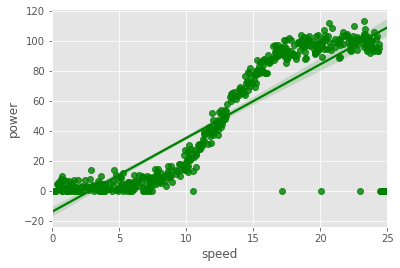

In [24]:
#use the linear regresssion plot within seaborn, to visualise the linear regression line

sns.regplot(data = df, x="speed", y="power", color='green')
plt.style.use('ggplot')
plt.show()

## Train and test the Linear Regression model

In [58]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression
pp_model = LinearRegression()
pp_model.fit(X_train, y_train)

LinearRegression()

In [61]:
print(pp_model.intercept_)

-13.603433993820211


In [62]:
print(pp_model.coef_)

[4.89542079]


In [63]:
y_pred = pp_model.predict(X_test)

### Analyse the output from the Train and Test Linear Regression Model

,Actual,Predicted
0,7.060,10.408605
1,51.149,48.632051
2,71.763,57.326318
3,99.357,96.161691
4,113.556,100.327694
...,...,...
95,96.058,77.911562
96,3.578,1.097515
97,93.931,95.304992
98,0.000,1.709442


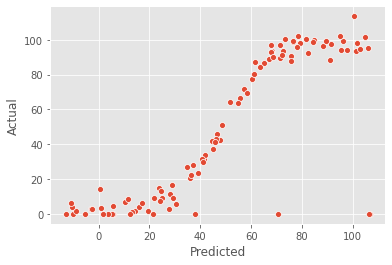

In [64]:
act_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


sns.scatterplot(act_vs_pred['Predicted'], act_vs_pred['Actual'])

act_vs_pred

We would expect the scatterplot of the actual vs predicted to be a straight line as we would expect the predicted and actual values to be identical (for a perfect model).

Interestingly the shape of the scatterplot of comparisons very closely mirrors the original data. We will try to analyse (time permitting) why this is the case.

## Test Case - Using the Lasso regression model

,Actual,Predicted
0,7.060,10.837904
1,51.149,48.621139
2,71.763,57.215277
3,99.357,95.603392
4,113.556,99.721417
...,...,...
95,96.058,77.563446
96,3.578,1.634047
97,93.931,94.756560
98,0.000,2.238927


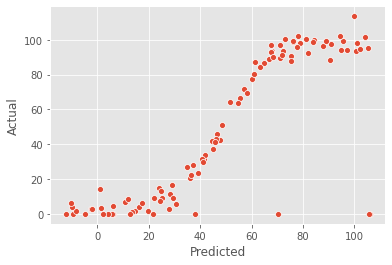

In [122]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


act_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

sns.scatterplot(act_vs_pred['Predicted'], act_vs_pred['Actual'])

act_vs_pred

## Exploring Polynomial Regression

In [151]:
# https://www.w3schools.com/python/python_ml_polynomial_regression.asp

#The code below checks for the r-squared value for the dataset to check for fit 

import numpy as np
from sklearn.metrics import r2_score

a =  df["speed"]
b =df["power"]

mymodel = np.poly1d(np.polyfit(a, b, 4))

print(r2_score(b, mymodel(a)))

0.8964014745348661


### Reference:

https://stackabuse.com/linear-regression-in-python-with-scikit-learn/